In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
column_names = ['ID', 'Clump Thickness', 'Uniformity of Cell Size', 
                'Uniformity of Cell Shape', 'MarginalAdhesion',
                'Single Epithelial Cell Size', 'BareNuclei', 
                'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
column_names = [C.replace(' ', '') for C in column_names]
df = pd.read_csv('/Users/joshuarkarnad/Desktop/Thinkful/Data/breast-cancer-wisconsin.data.txt', names = column_names)

In [3]:
from sklearn.model_selection import train_test_split

df['Cancer'] = (df.Class > 2).astype(int)
df = df.drop('ID', axis = 1)
df = df.drop('Class', axis =1)
df.loc[df['BareNuclei'] == '?', 'BareNuclei'] = 0
from sklearn.model_selection import cross_val_score

In [4]:
df_train, df_test = train_test_split(df, test_size=0.2)
X_train = df_train.loc[:, ~(df_train.columns).isin(['Cancer'])]
Y_train = df_train.Cancer
X_test = df_test.loc[:, ~(df_test.columns).isin(['Cancer'])]
Y_test = df_test.Cancer

In [6]:
ridge = RidgeClassifier()
ridge.fit(X_train, Y_train)
Y_pred_ridge = ridge.predict(X_test)
accuracy_score(Y_test, Y_pred_ridge)

0.95714285714285718

In [8]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
Y_GBC_pred = gbc.predict(X_test)
accuracy_score(Y_test, Y_GBC_pred)

0.93571428571428572

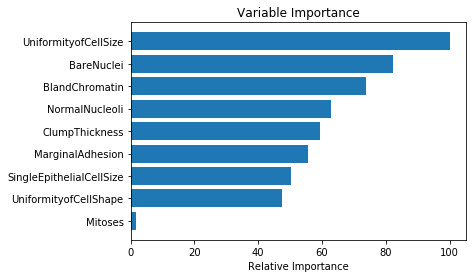

In [9]:
feature_importance = gbc.feature_importances_
import scipy
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [10]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_RFC_Pred = rfc.predict(X_test)
accuracy_score(Y_test, Y_RFC_Pred)

0.95714285714285718

In [11]:
ridge_params = {'alpha': range(1,10), 'fit_intercept':[True,False],
               'normalize': [True,False]}

In [12]:
from sklearn.model_selection import GridSearchCV
GSridge = GridSearchCV(ridge, ridge_params)

In [13]:
GSridge.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': range(1, 10), 'fit_intercept': [True, False], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
GSridge.cv_results_

/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/jo

{'mean_fit_time': array([ 0.0024879 ,  0.00181746,  0.00236567,  0.00214497,  0.00261712,
         0.0019633 ,  0.001604  ,  0.0015951 ,  0.00171971,  0.00166353,
         0.00164843,  0.00162943,  0.00169571,  0.00163468,  0.00157468,
         0.00162943,  0.00169635,  0.00163841,  0.00161282,  0.00157547,
         0.00169245,  0.00164731,  0.00157777,  0.00163356,  0.00171192,
         0.0016679 ,  0.00162586,  0.00159534,  0.00169794,  0.00163794,
         0.0015823 ,  0.00157762,  0.00174499,  0.00167394,  0.00160321,
         0.00162093]),
 'mean_score_time': array([ 0.00054272,  0.00040849,  0.00060391,  0.00051832,  0.00068363,
         0.0004491 ,  0.00038727,  0.00038719,  0.00039307,  0.00039077,
         0.00039196,  0.00038719,  0.00038966,  0.00039212,  0.00038838,
         0.0003957 ,  0.00039029,  0.00039204,  0.00038846,  0.00039021,
         0.00040499,  0.00039268,  0.00038894,  0.00040301,  0.00039522,
         0.00039101,  0.00040881,  0.00038926,  0.00039132,  0.00

In [16]:
GSridge.best_score_

0.95527728085867625

In [17]:
GSridge.best_params_

{'alpha': 1, 'fit_intercept': True, 'normalize': False}

In [18]:
best_ridge = RidgeClassifier(alpha=1, fit_intercept=True, normalize=False)

In [19]:
best_ridge.fit(X_train, Y_train)
Y_pred_bestridge = best_ridge.predict(X_test)
accuracy_score(Y_test, Y_pred_bestridge)

0.95714285714285718

In [22]:
rfc_params = {'n_estimators': range(10,100,2), 'max_features': range(2,5),
             'max_depth': [2,10]}
GSrfc = GridSearchCV(rfc, rfc_params)
GSrfc.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(10, 100, 2), 'max_features': range(2, 5), 'max_depth': [2, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
GSrfc.best_params_

{'max_depth': 10, 'max_features': 2, 'n_estimators': 68}

In [24]:
best_rfc = RandomForestClassifier(n_estimators=68, max_depth=10, max_features=2)

In [25]:
best_rfc.fit(X_train, Y_train)
Y_best_rfc = best_rfc.predict(X_test)
accuracy_score(Y_test,Y_best_rfc)

0.95714285714285718

Looks like the max score possible is .957